In [1]:
import pandas as pd
from datetime import time
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
df = pd.read_excel("garmin_activities.xlsx")

df_running = df[df["Activity Type"].isin(["Trail Running", "Running"])]

mask = df_running["Avg Pace"].apply(lambda x: isinstance(x, datetime.timedelta))
#apply znači da dodajemo funkciju koja provjerava svaki red, a isinstance provjerava tip objekta i vraća true/false
#koristimo ovo da maknemo svaki pace koji je iznad 24:00 po km

df_running = df_running[~mask]
#znak ~ znači da koristi sve redove obrnute od mask (da nema toga znaka ispisali bi se true redovi)


In [3]:
hr_list = []

for hr in df_running["Avg HR"]:
    hr_list.append(hr)

In [4]:
pace_list = []

for pace in df_running["Avg Pace"]:
    pace_list.append(round(pace.hour + pace.minute/60, 2))


In [5]:
def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 2.5 * IQR
    return data <= upper

pace_array = np.array(pace_list)
hr_array = np.array(hr_list)

mask = remove_outliers(pace_array) #true ili false

pace_list_clean = pace_array[mask].tolist() #dodaje ako je true
hr_list_clean = hr_array[mask].tolist()


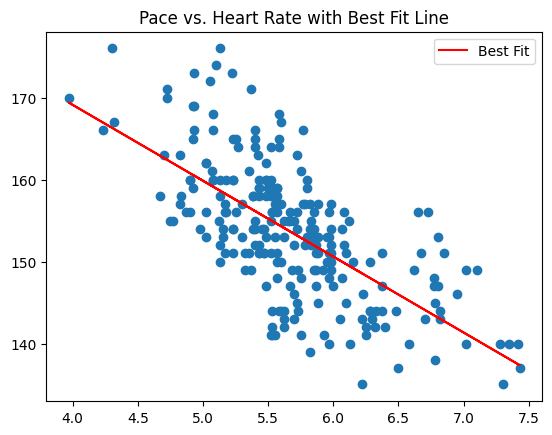

In [6]:
plt.scatter(pace_list_clean, hr_list_clean)
m, b = np.polyfit(pace_list_clean, hr_list_clean, 1)
best_fit_line = np.array(pace_list_clean) * m + b
plt.plot(pace_list_clean, best_fit_line, color='red', linestyle='-', label='Best Fit')

plt.xlabel = "Average Pace"
plt.ylabel = "Average Heart Rate"
plt.title('Pace vs. Heart Rate with Best Fit Line')
plt.legend()